<a href="https://colab.research.google.com/github/bhanuteja3264/IPL-Player-analysis/blob/main/paper_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [ ]:
df=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df.drop(['total_runs','non_boundary'],axis='columns')

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_data = df[['batsman', 'batsman_runs']]
cluster_data['1s'] = (cluster_data['batsman_runs'] == 1).astype(int)
cluster_data['2s'] = (cluster_data['batsman_runs'] == 2).astype(int)
cluster_data['3s'] = (cluster_data['batsman_runs'] == 3).astype(int)
cluster_data['4s'] = (cluster_data['batsman_runs'] == 4).astype(int)
cluster_data['6s'] = (cluster_data['batsman_runs'] == 6).astype(int)
cluster_data_grouped = cluster_data.groupby('batsman').agg({
    '1s': 'sum',
    '2s': 'sum',
    '3s': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'batsman_runs': 'sum'
}).reset_index()
features = ['1s', '2s', '3s', '4s', '6s', 'batsman_runs']
cluster_data_selected = cluster_data_grouped[features]
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data_selected)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data_scaled)
print(cluster_data_grouped.head())

          batsman  1s  2s  3s  4s  6s  batsman_runs
0  A Ashish Reddy  83  20   1  16  15           280
1      A Chandila   4   0   0   0   0             4
2        A Chopra  21   2   0   7   0            53
3     A Choudhary  13   1   0   1   1            25
4     A Dananjaya   2   1   0   0   0             4


<ipython-input-6-9fdab8ed7fb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['1s'] = (cluster_data['batsman_runs'] == 1).astype(int)
<ipython-input-6-9fdab8ed7fb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['2s'] = (cluster_data['batsman_runs'] == 2).astype(int)
<ipython-input-6-9fdab8ed7fb7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
df1=cluster_data_grouped
df1.head(20)

,batsman,1s,2s,3s,4s,6s,batsman_runs
0,A Ashish Reddy,83,20,1,16,15,280
1,A Chandila,4,0,0,0,0,4
2,A Chopra,21,2,0,7,0,53
3,A Choudhary,13,1,0,1,1,25
4,A Dananjaya,2,1,0,0,0,4
5,A Flintoff,23,2,1,5,2,62
6,A Kumble,21,1,0,3,0,35
7,A Mishra,172,22,0,29,5,362
8,A Mithun,8,2,0,4,1,34
9,A Mukund,11,2,0,1,0,19


Enter the player's name: V Kohli


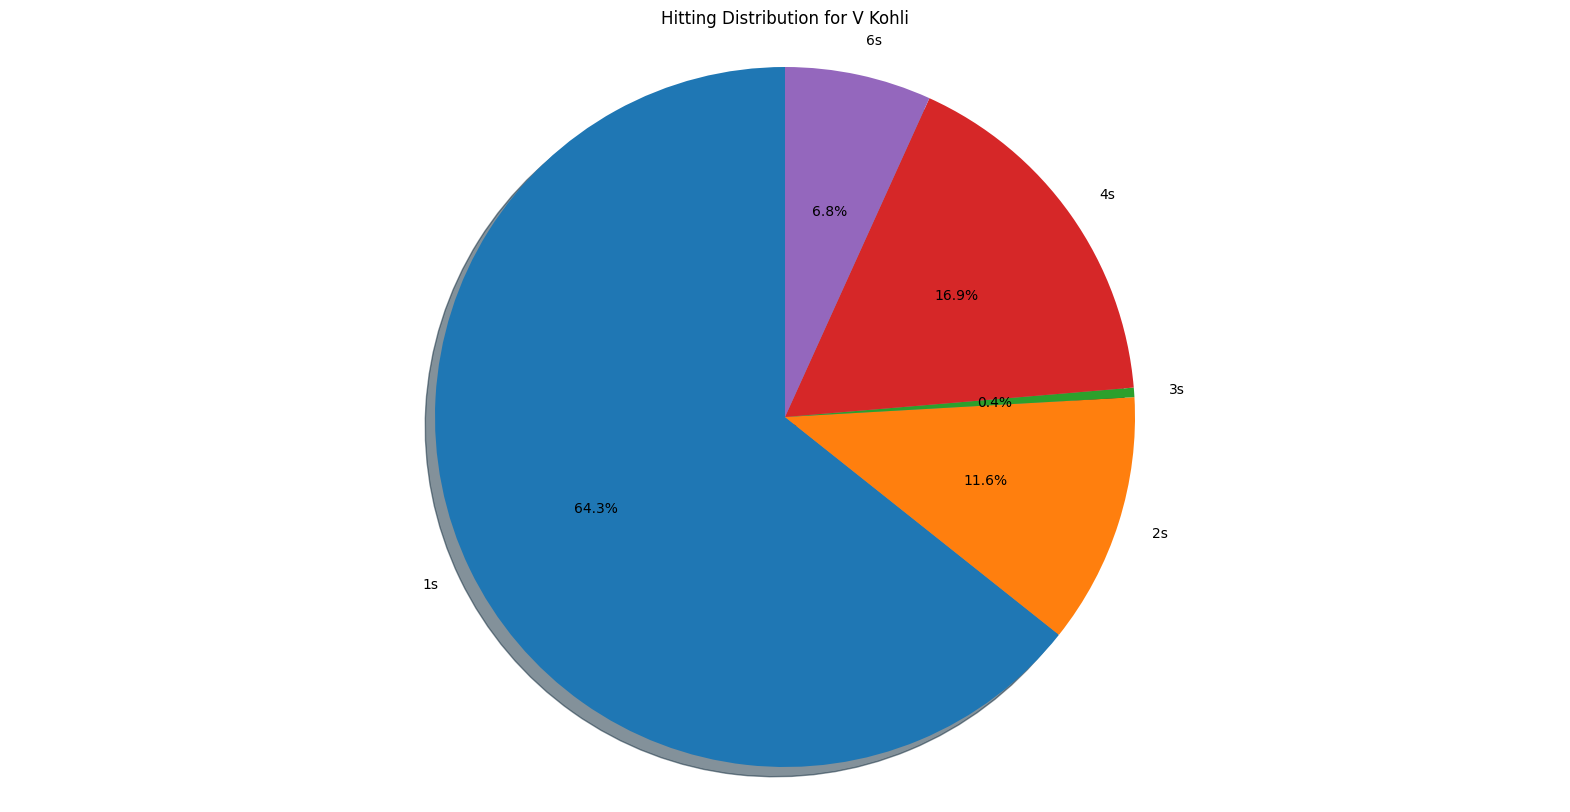

In [ ]:
player= input("Enter the player's name: ")
df_batsman = df1[df1['batsman'] == player]
if df_batsman.empty:
    print(f"No data found for {player_name}. Please check the player's name.")
else:
    labels = ['1s', '2s', '3s', '4s', '6s']
    sizes = df_batsman[['1s', '2s', '3s', '4s', '6s']].sum().tolist()
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f"Hitting Distribution for {player}")
    plt.show()

Enter player 1's name: V Kohli
Enter player 2's name: A Nehra
Enter player 3's name: Yuvraj Singh


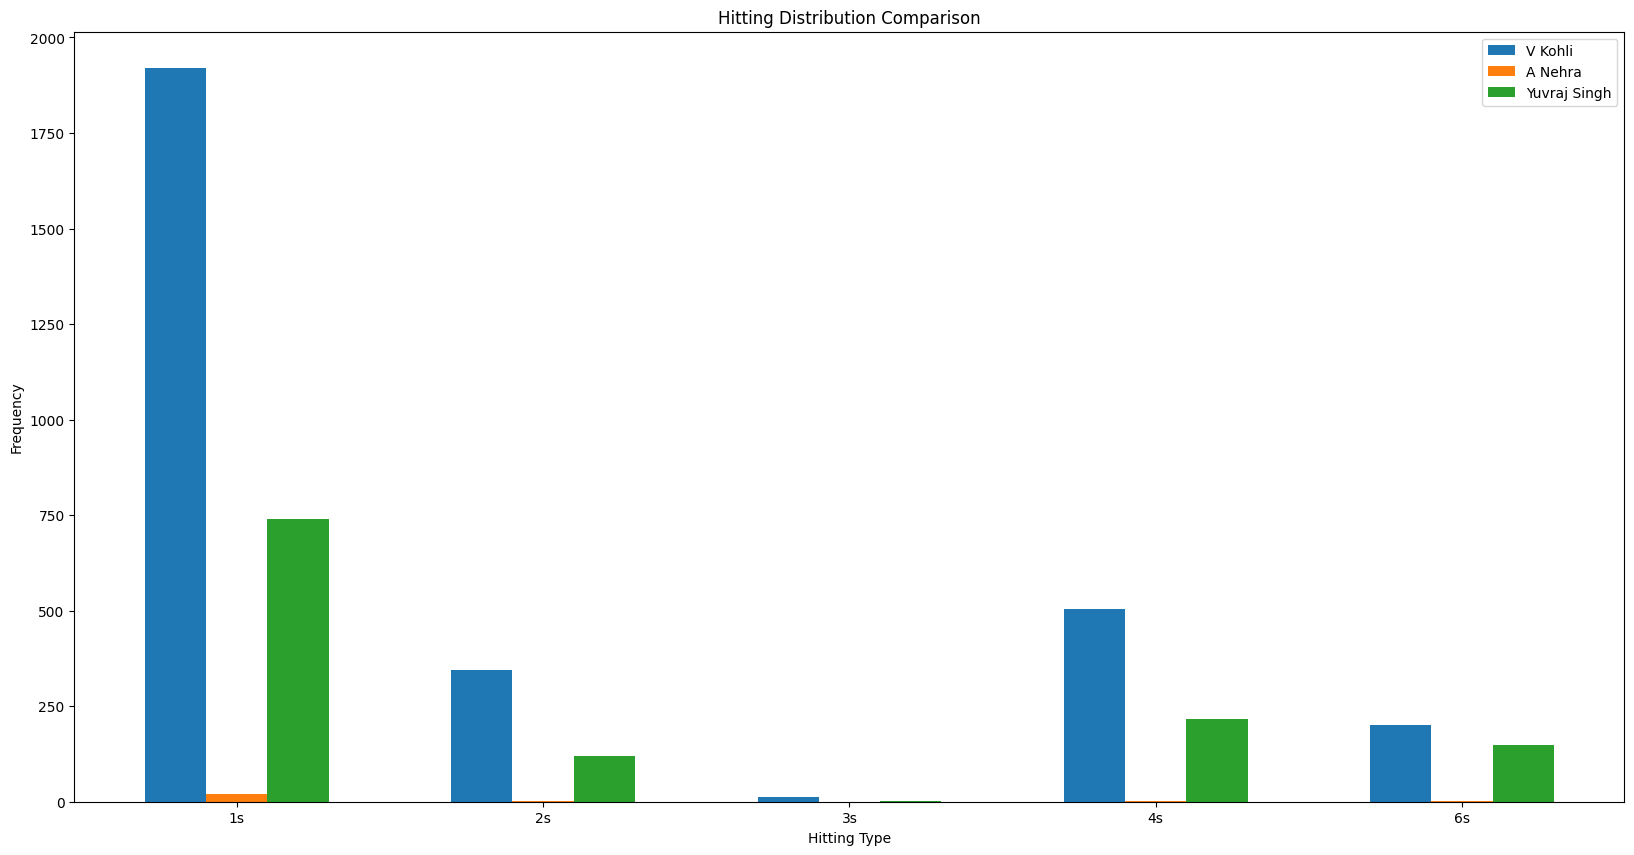

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot hitting distribution for a given batsman
def plot_hitting_distribution(players, df):
    labels = ['1s', '2s', '3s', '4s', '6s']
    bar_width = 0.2
    index = np.arange(len(labels))

    fig, ax = plt.subplots()

    for i, player in enumerate(players):
        df_batsman = df[df['batsman'] == player]
        if not df_batsman.empty:
            sizes = df_batsman[['1s', '2s', '3s', '4s', '6s']].sum().tolist()
            ax.bar(index + i * bar_width, sizes, bar_width, label=player)

    ax.set_xlabel('Hitting Type')
    ax.set_ylabel('Frequency')
    ax.set_title('Hitting Distribution Comparison')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

# User input for three batsmen
players = []
for i in range(3):
    player = input(f"Enter player {i+1}'s name: ")
    players.append(player)

# Plotting hitting distribution for each batsman
plot_hitting_distribution(players, df1)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_data = df[['bowler', 'batsman_runs']]
cluster_data['1s'] = (cluster_data['batsman_runs'] == 1).astype(int)
cluster_data['2s'] = (cluster_data['batsman_runs'] == 2).astype(int)
cluster_data['3s'] = (cluster_data['batsman_runs'] == 3).astype(int)
cluster_data['4s'] = (cluster_data['batsman_runs'] == 4).astype(int)
cluster_data['6s'] = (cluster_data['batsman_runs'] == 6).astype(int)
cluster_data_grouped1 = cluster_data.groupby('bowler').agg({
    '1s': 'sum',
    '2s': 'sum',
    '3s': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'batsman_runs': 'sum'
}).reset_index()
features = ['1s', '2s', '3s', '4s', '6s', 'batsman_runs']
cluster_data_selected1 = cluster_data_grouped1[features]
scaler = StandardScaler()
cluster_data_scaled1 = scaler.fit_transform(cluster_data_selected1)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data_scaled1)
print(cluster_data_grouped1.head())

<ipython-input-6-2bb1382fb154>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['1s'] = (cluster_data['batsman_runs'] == 1).astype(int)
<ipython-input-6-2bb1382fb154>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['2s'] = (cluster_data['batsman_runs'] == 2).astype(int)
<ipython-input-6-2bb1382fb154>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

           bowler   1s  2s  3s  4s  6s  batsman_runs
0  A Ashish Reddy  110  23   2  26  20           386
1      A Chandila   91  10   1  17  10           242
2     A Choudhary   31   9   0  13   6           137
3     A Dananjaya   10   2   0   2   4            46
4      A Flintoff   27   4   0   7   7           105


In [ ]:
df2=cluster_data_grouped1
df2.head(20)

,bowler,1s,2s,3s,4s,6s,batsman_runs
0,A Ashish Reddy,110,23,2,26,20,386
1,A Chandila,91,10,1,17,10,242
2,A Choudhary,31,9,0,13,6,137
3,A Dananjaya,10,2,0,2,4,46
4,A Flintoff,27,4,0,7,7,105
5,A Kumble,406,57,3,72,35,1027
6,A Mishra,1378,236,6,222,172,3788
7,A Mithun,117,17,1,42,21,448
8,A Nehra,621,103,6,279,76,2422
9,A Nel,5,1,0,3,2,31


Enter the player's name: A Nel


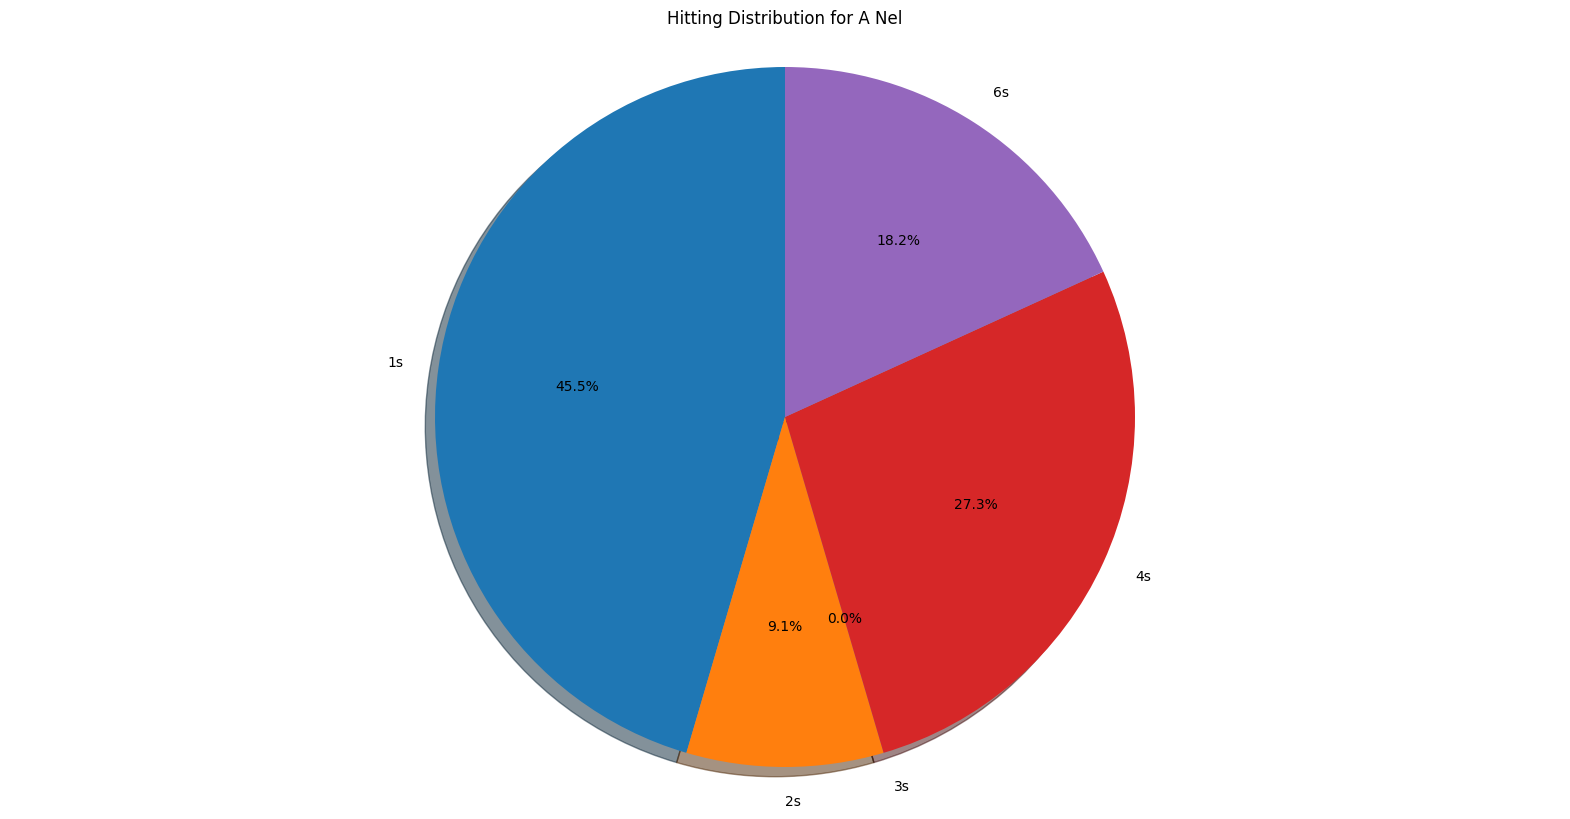

In [ ]:
player = input("Enter the player's name: ")
df2_batsman = df2[df2['bowler'] == player]
if df2_batsman.empty:
    print(f"No data found for {player}. Please check the player's name.")
else:
    labels = ['1s', '2s', '3s', '4s', '6s']
    sizes = df2_batsman[['1s', '2s', '3s', '4s', '6s']].sum().tolist()
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f"Hitting Distribution for {player}")
    plt.show()

Enter player 1's name: A Nel
Enter player 2's name: RA Jadeja
Enter player 3's name: A Nehra


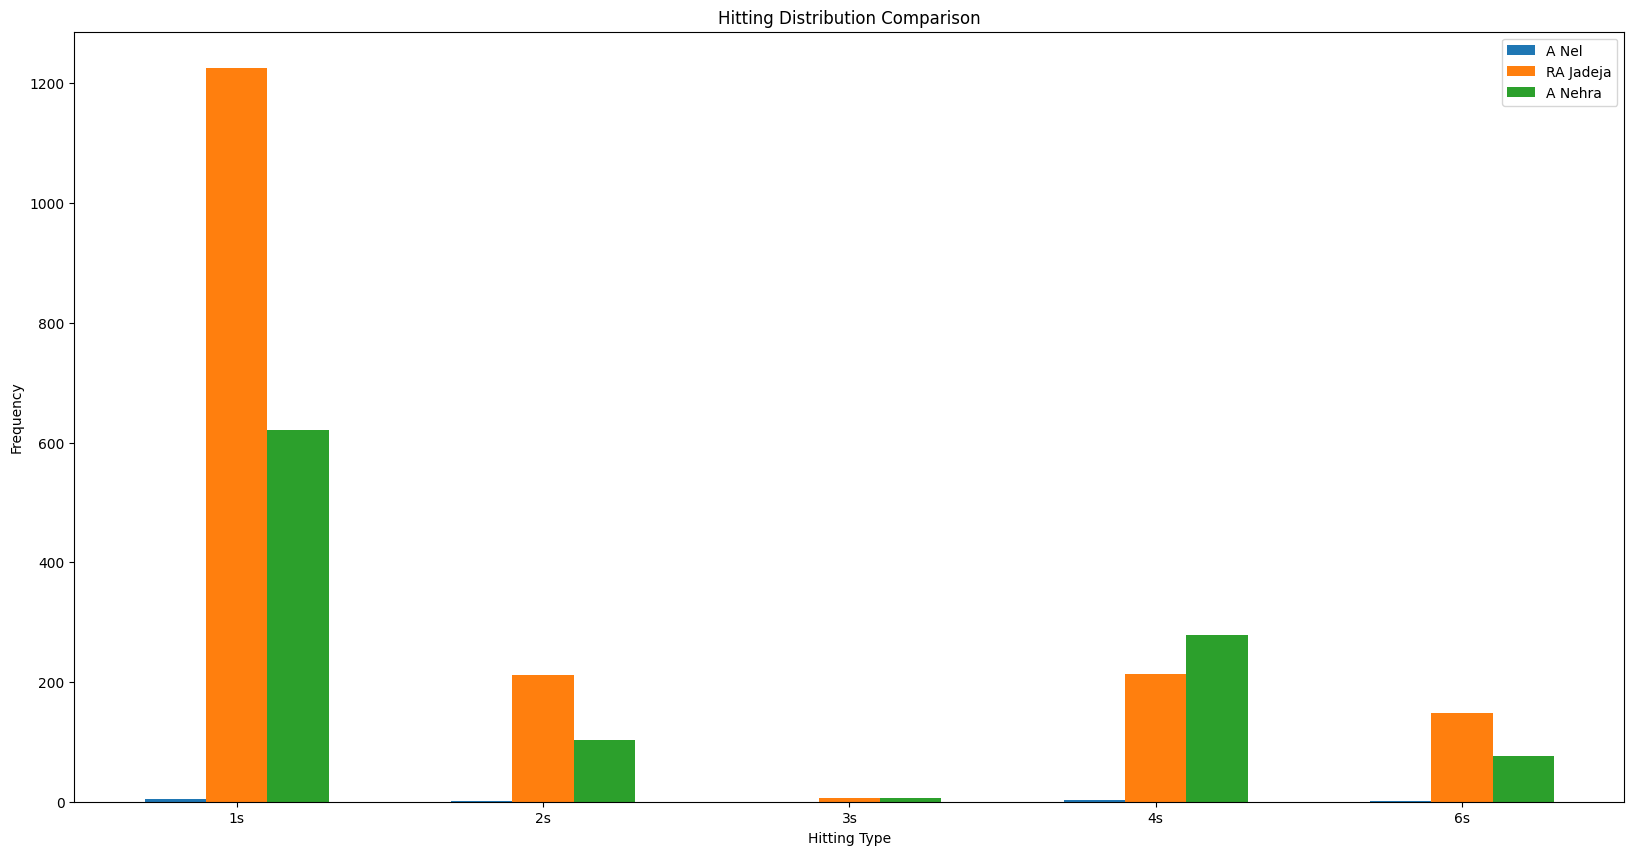

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot hitting distribution for a given batsman
def plot_hitting_distribution(players, df):
    labels = ['1s', '2s', '3s', '4s', '6s']
    bar_width = 0.2
    index = np.arange(len(labels))

    fig, ax = plt.subplots()

    for i, player in enumerate(players):
        df_batsman = df[df['bowler'] == player]
        if not df_batsman.empty:
            sizes = df_batsman[['1s', '2s', '3s', '4s', '6s']].sum().tolist()
            ax.bar(index + i * bar_width, sizes, bar_width, label=player)

    ax.set_xlabel('Hitting Type')
    ax.set_ylabel('Frequency')
    ax.set_title('Hitting Distribution Comparison')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

# User input for three batsmen
players = []
for i in range(3):
    player = input(f"Enter player {i+1}'s name: ")
    players.append(player)

# Plotting hitting distribution for each batsman
plot_hitting_distribution(players, df2)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
cluster_data = df[['batsman', 'batsman_runs', 'dismissal_kind']]
dismissal_types = ['caught', 'bowled', 'lbw', 'runout','stumped']
for dismissal_type in dismissal_types:
    cluster_data[dismissal_type] = (cluster_data['dismissal_kind'] == dismissal_type).astype(int)
cluster_data_grouped3 = cluster_data.groupby('batsman').agg({
    'caught': 'sum',
    'bowled': 'sum',
    'lbw': 'sum',
    'runout': 'sum',
    'stumped':'sum'
}).reset_index()
features = ['caught', 'bowled', 'lbw', 'runout','stumped']
cluster_data_selected3 = cluster_data_grouped3[features]
scaler = StandardScaler()
cluster_data_scaled3 = scaler.fit_transform(cluster_data_selected3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data_scaled3)
print(cluster_data_grouped3.head())

          batsman  caught  bowled  lbw  runout  stumped
0  A Ashish Reddy       8       5    0       0        0
1      A Chandila       0       0    0       0        0
2        A Chopra       2       0    1       0        1
3     A Choudhary       1       0    0       0        0
4     A Dananjaya       0       0    0       0        0


<ipython-input-10-353b354f99bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[dismissal_type] = (cluster_data['dismissal_kind'] == dismissal_type).astype(int)
<ipython-input-10-353b354f99bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[dismissal_type] = (cluster_data['dismissal_kind'] == dismissal_type).astype(int)
<ipython-input-10-353b354f99bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
df3=cluster_data_grouped3
df3.head(20)

,batsman,caught,bowled,lbw,runout,stumped
0,A Ashish Reddy,8,5,0,0,0
1,A Chandila,0,0,0,0,0
2,A Chopra,2,0,1,0,1
3,A Choudhary,1,0,0,0,0
4,A Dananjaya,0,0,0,0,0
5,A Flintoff,1,0,0,0,0
6,A Kumble,1,1,0,0,0
7,A Mishra,9,9,1,0,0
8,A Mithun,4,1,0,0,0
9,A Mukund,0,2,0,0,0


Enter the player's name: V Kohli


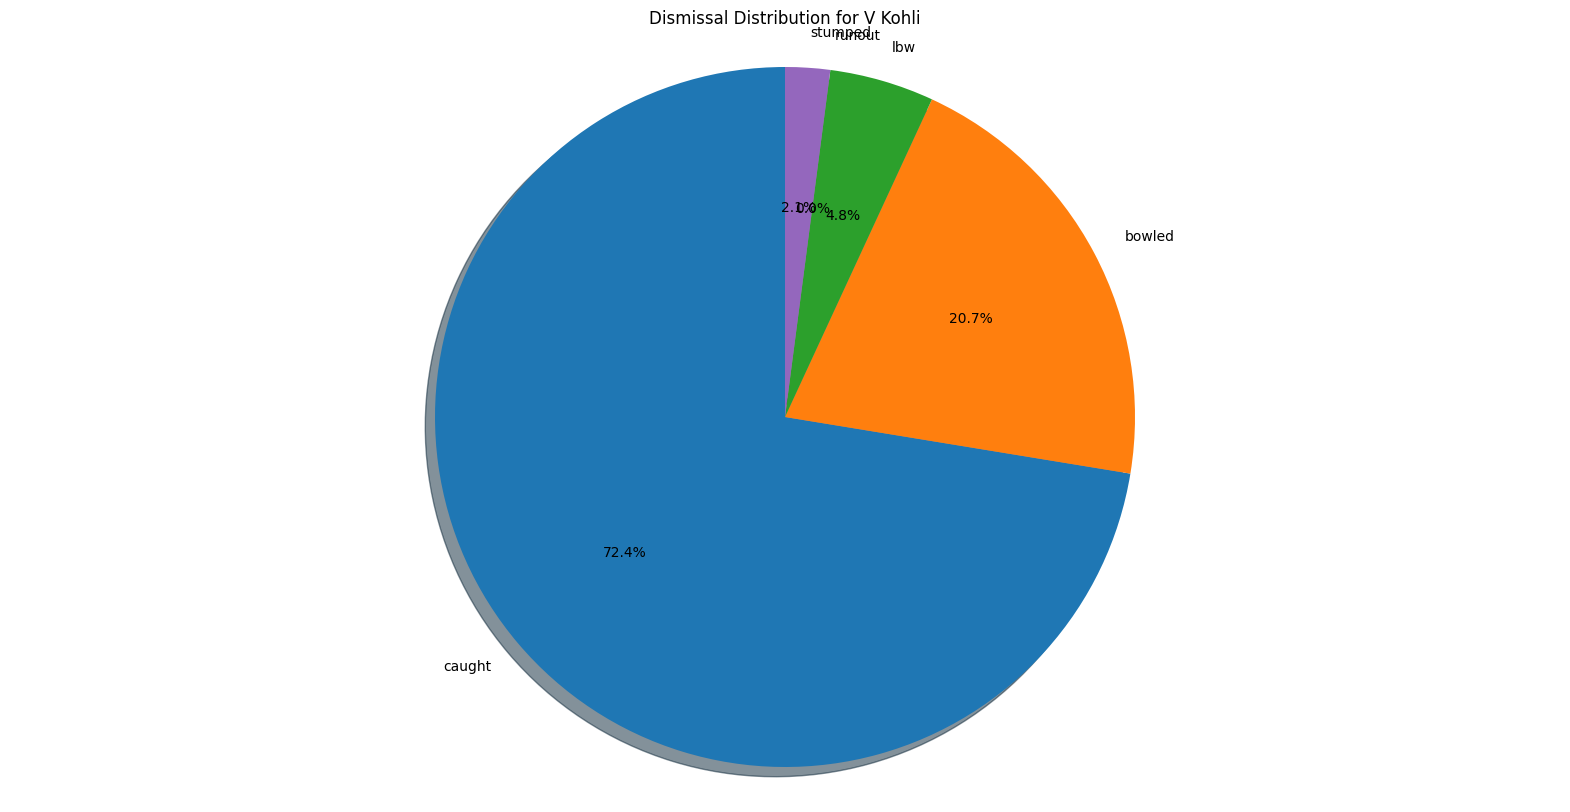

In [ ]:
player = input("Enter the player's name: ")
df3_batsman = df3[df3['batsman'] == player]
if df3_batsman.empty:
    print(f"No data found for {player}. Please check the player's name.")
else:
    labels = ['caught', 'bowled', 'lbw', 'runout', 'stumped']
    sizes = df3_batsman[['caught', 'bowled', 'lbw', 'runout', 'stumped']].sum().tolist()
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title(f"Dismissal Distribution for {player}")
    plt.show()

Enter player 1's name: V Kohli
Enter player 2's name: Yuvraj Singh
Enter player 3's name: RA Jadeja


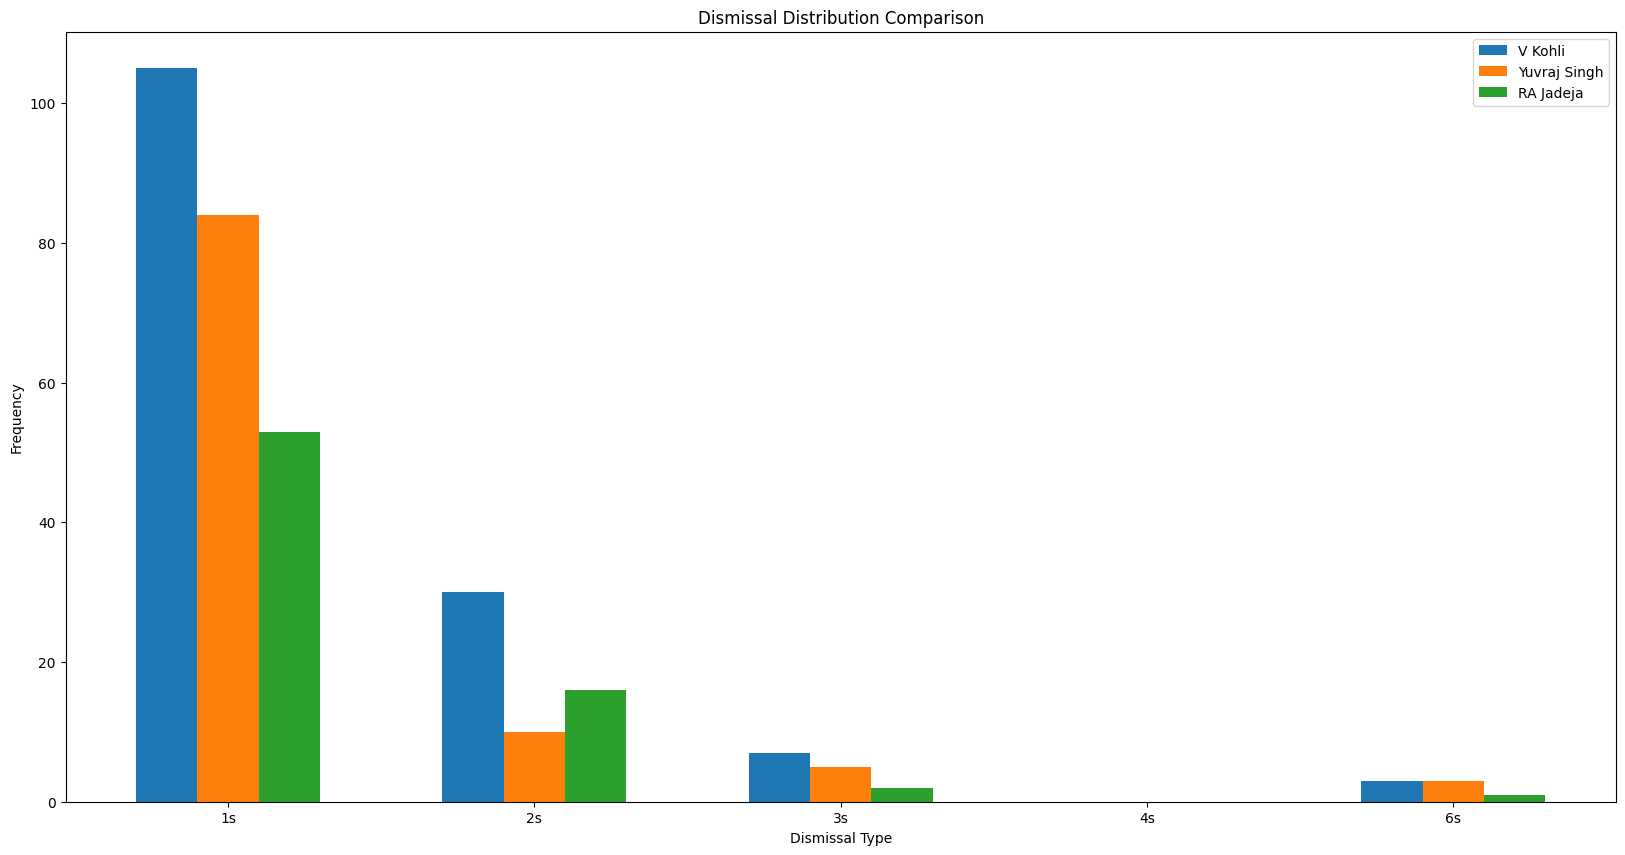

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot dismissal distribution for a given player
def plot_dismissal_distribution(players, df):
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(labels))

    for i, player in enumerate(players):
        df_player = df[df['batsman'] == player]
        if not df_player.empty:
            sizes = df_player[['caught', 'bowled', 'lbw', 'runout', 'stumped']].sum().tolist()
            ax.bar(index + i * bar_width, sizes, bar_width, label=player)

    ax.set_xlabel('Dismissal Type')
    ax.set_ylabel('Frequency')
    ax.set_title('Dismissal Distribution Comparison')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

# User input for three players
players = []
for i in range(3):
    player = input(f"Enter player {i+1}'s name: ")
    players.append(player)

# Plotting dismissal distribution for each player
plot_dismissal_distribution(players, df3)


In [ ]:
cluster_data = df[['bowler', 'batsman_runs', 'dismissal_kind']]
dismissal_types = ['caught', 'bowled', 'lbw','stumped']
for dismissal_type in dismissal_types:
    cluster_data[dismissal_type] = (cluster_data['dismissal_kind'] == dismissal_type).astype(int)
cluster_data_grouped4 = cluster_data.groupby('bowler').agg({
    'caught': 'sum',
    'bowled': 'sum',
    'lbw': 'sum',
    'stumped':'sum'
}).reset_index()
features = ['caught', 'bowled', 'lbw','stumped']
cluster_data_selected4 = cluster_data_grouped4[features]
scaler = StandardScaler()
cluster_data_scaled4 = scaler.fit_transform(cluster_data_selected4)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data_scaled4)
print(cluster_data_grouped4.head())

<ipython-input-14-810bab69d5af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[dismissal_type] = (cluster_data['dismissal_kind'] == dismissal_type).astype(int)
<ipython-input-14-810bab69d5af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[dismissal_type] = (cluster_data['dismissal_kind'] == dismissal_type).astype(int)
<ipython-input-14-810bab69d5af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

           bowler  caught  bowled  lbw  stumped
0  A Ashish Reddy       8       6    3        0
1      A Chandila       4       0    0        2
2     A Choudhary       5       0    0        0
3     A Dananjaya       0       0    0        0
4      A Flintoff       1       0    0        0


In [ ]:
df4=cluster_data_grouped4
df4.head(20)

,bowler,caught,bowled,lbw,stumped
0,A Ashish Reddy,8,6,3,0
1,A Chandila,4,0,0,2
2,A Choudhary,5,0,0,0
3,A Dananjaya,0,0,0,0
4,A Flintoff,1,0,0,0
5,A Kumble,24,8,4,8
6,A Mishra,92,25,13,27
7,A Mithun,5,2,0,0
8,A Nehra,76,23,5,0
9,A Nel,1,0,0,0


Enter the player's name: A Nehra	


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


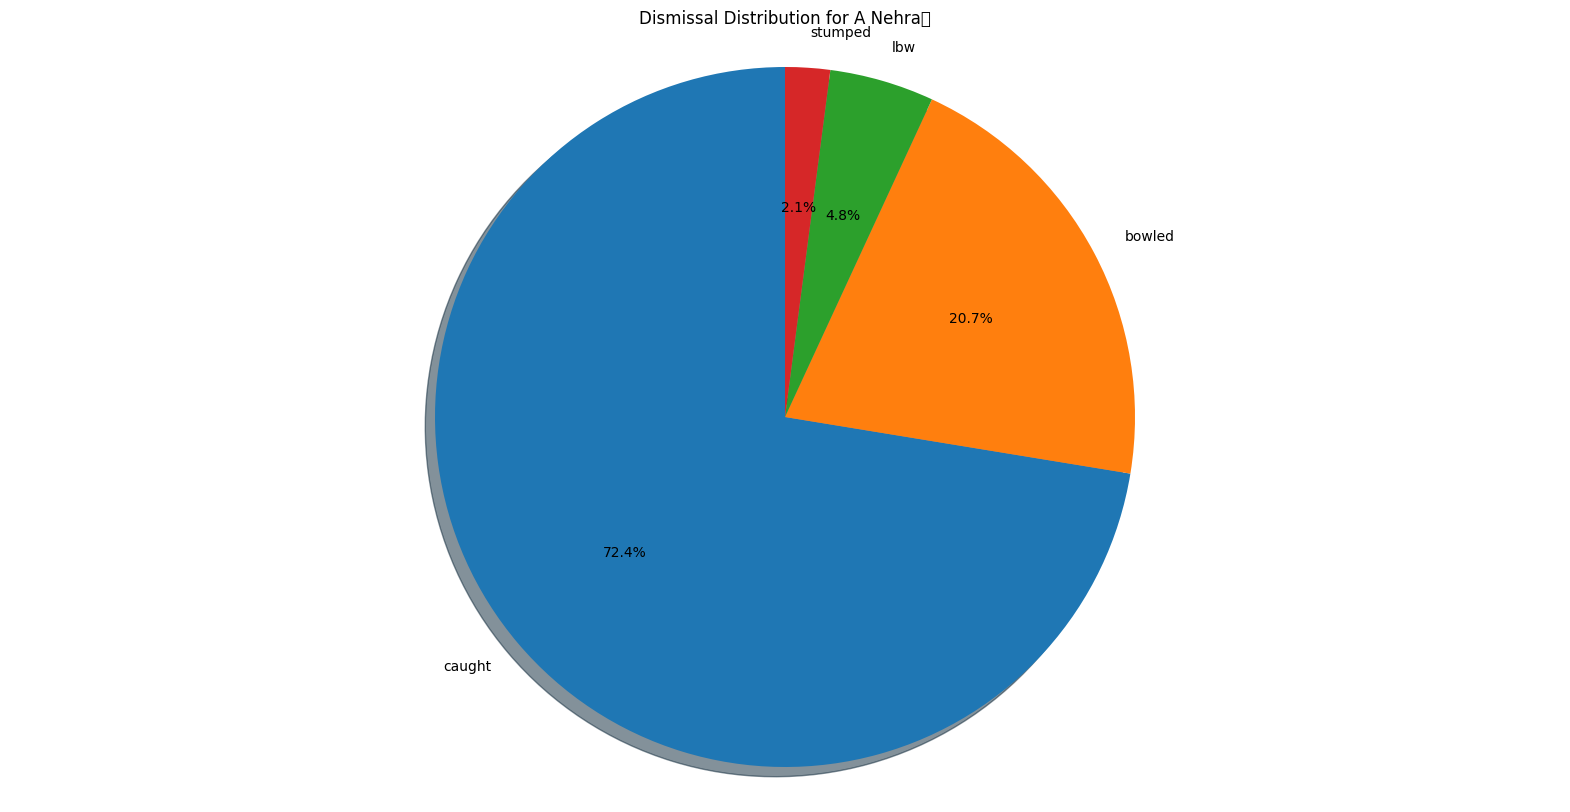

In [ ]:
player = input("Enter the player's name: ")
df4_batsman = df4[df4['bowler'] == player]
if df3_batsman.empty:
    print(f"No data found for {player}. Please check the player's name.")
else:
    labels = ['caught', 'bowled', 'lbw',  'stumped']
    sizes = df3_batsman[['caught', 'bowled', 'lbw',  'stumped']].sum().tolist()
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title(f"Dismissal Distribution for {player}")
    plt.show()

Enter player 1's name: AB Agarkar
Enter player 2's name: A Ashish Reddy
Enter player 3's name: RA Jadeja


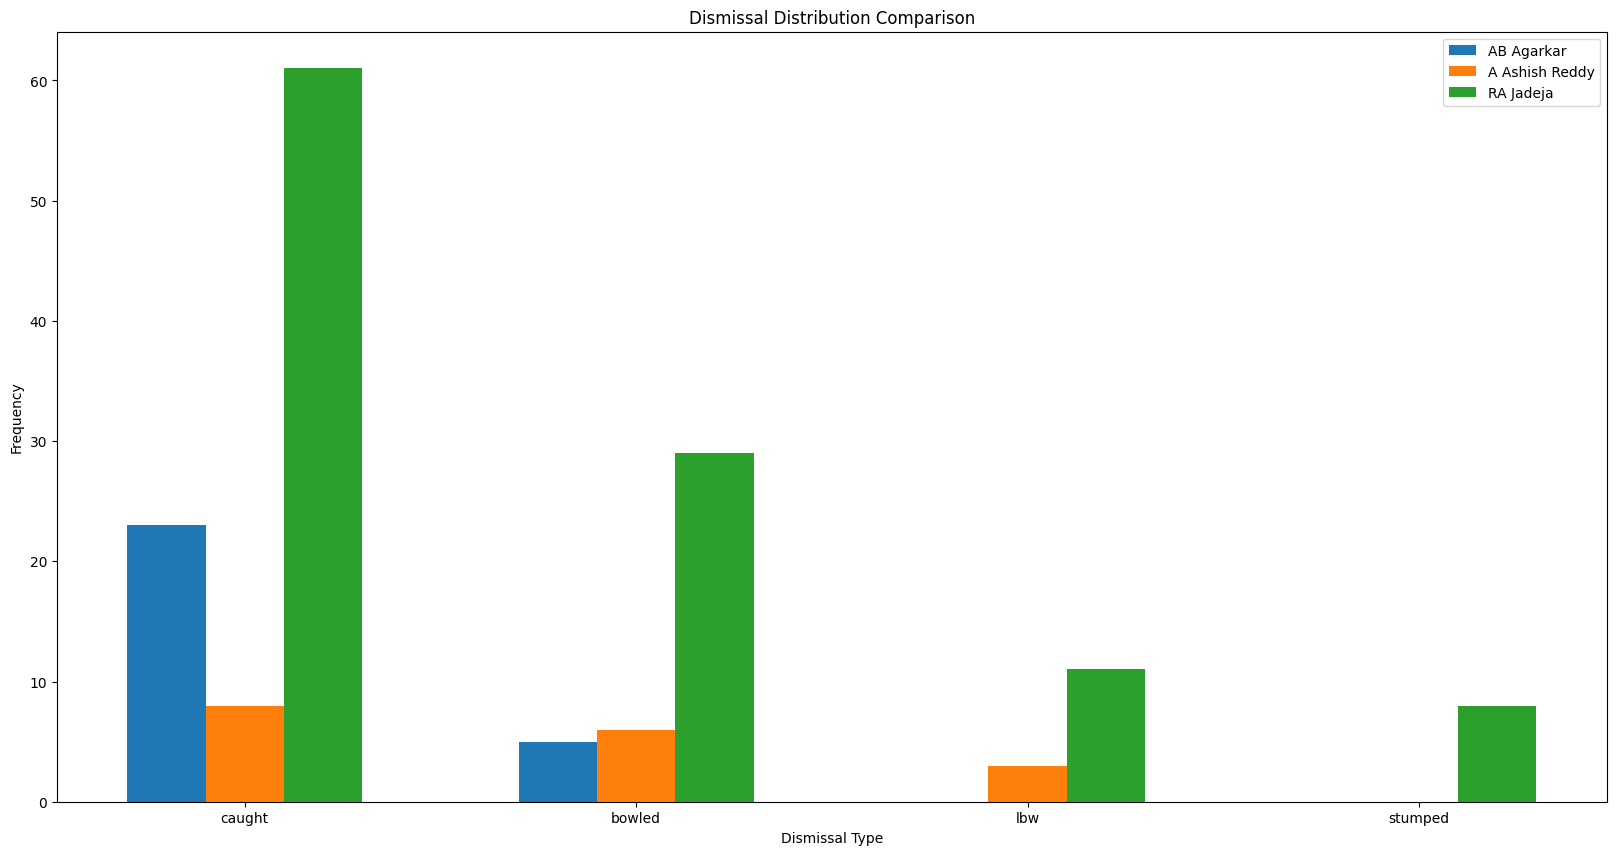

In [ ]:
def plot_dismissal_distribution(players, df):
    labels = ['caught', 'bowled', 'lbw', 'stumped']
    bar_width = 0.2
    index = np.arange(len(labels))
    fig, ax = plt.subplots()
    for i, player in enumerate(players):
        df_bowler = df[df['bowler'] == player]
        if not df_bowler.empty:
            sizes = df_bowler[['caught', 'bowled', 'lbw', 'stumped']].sum().tolist()
            ax.bar(index + i * bar_width, sizes, bar_width, label=player)
    ax.set_xlabel('Dismissal Type')
    ax.set_ylabel('Frequency')
    ax.set_title('Dismissal Distribution Comparison')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()
players = []
for i in range(3):
    player = input(f"Enter player {i+1}'s name: ")
    players.append(player)
plot_dismissal_distribution(players, df4)

In [ ]:
cluster_data = df[['bowler', 'extra_runs', 'extras_type']]
extra_run_types = ['wides', 'no balls', 'byes','legbyes']
for extra_run_type in extra_run_types:
    cluster_data[extra_run_type] = (cluster_data['extras_type'] == extra_run_type).astype(int)
cluster_data_grouped5 = cluster_data.groupby('bowler').agg({
    'wides': 'sum',
    'no balls': 'sum',
    'byes': 'sum',
    'legbyes':'sum'
}).reset_index()
features = ['wides', 'no balls', 'byes', 'legbyes']
cluster_data_selected5 = cluster_data_grouped5[features]
scaler = StandardScaler()
cluster_data_scaled5 = scaler.fit_transform(cluster_data_selected5)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data_scaled5)
print(cluster_data_grouped5.head())

<ipython-input-6-87ece5bff92d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[extra_run_type] = (cluster_data['extras_type'] == extra_run_type).astype(int)
<ipython-input-6-87ece5bff92d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data[extra_run_type] = (cluster_data['extras_type'] == extra_run_type).astype(int)
<ipython-input-6-87ece5bff92d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

NameError: name 'StandardScaler' is not defined

In [ ]:
df5=cluster_data_grouped5
df5.head(20)

,bowler,wides,no balls,byes,legbyes
0,A Ashish Reddy,6,0,2,2
1,A Chandila,0,0,0,2
2,A Flintoff,0,0,1,0
3,A Kumble,13,0,0,23
4,A Mishra,40,0,2,27
5,A Mithun,15,0,1,4
6,A Nehra,52,0,2,27
7,A Nel,0,0,0,0
8,A Singh,12,0,2,9
9,A Symonds,12,0,4,12


Enter the player's name: A Zampa


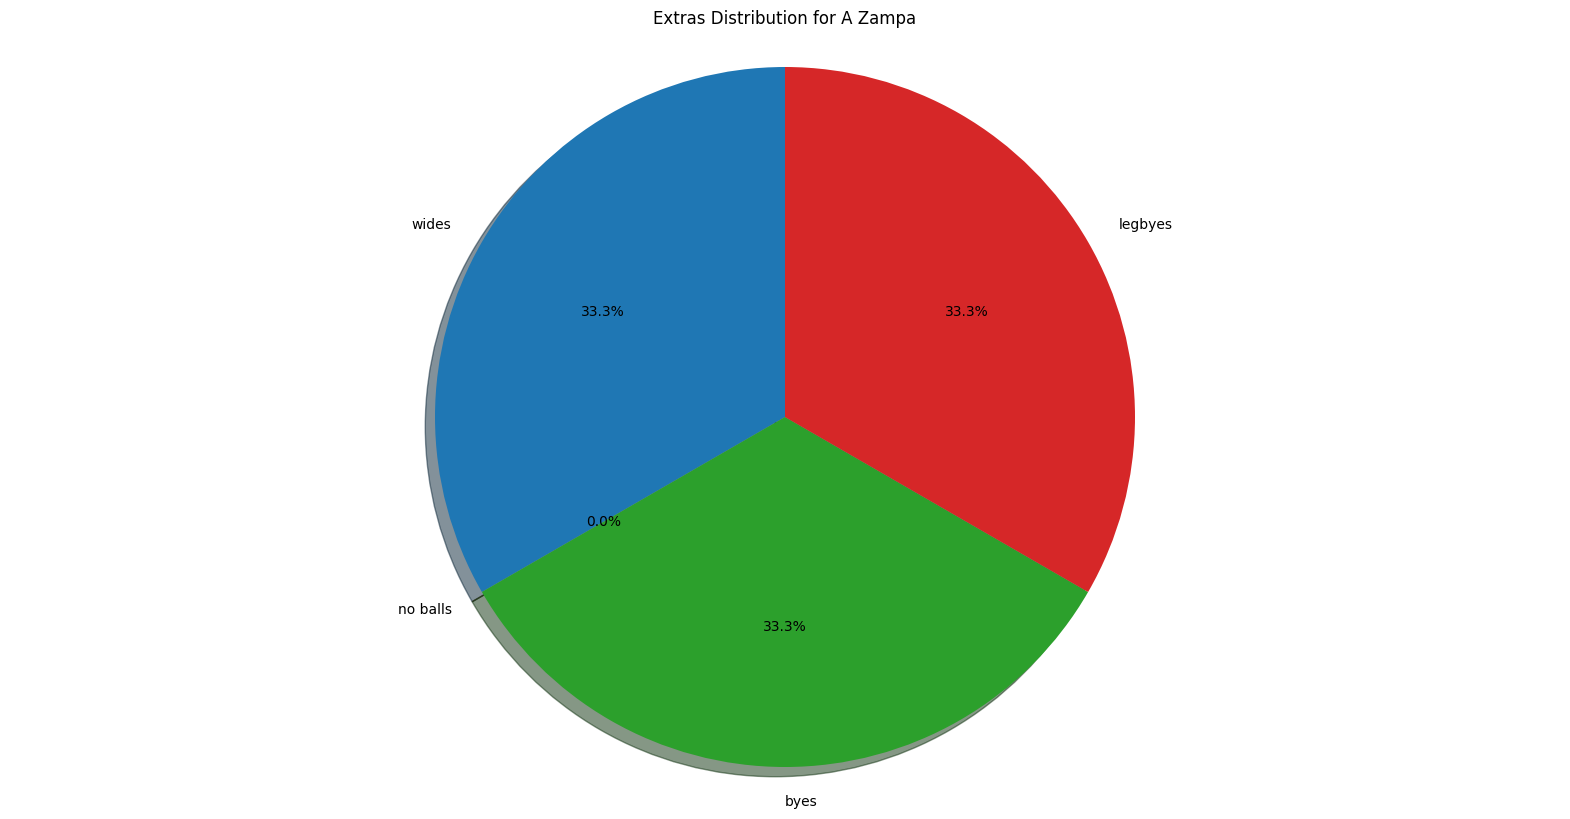

In [ ]:
player = input("Enter the player's name: ")
df5_batsman = df5[df5['bowler'] == player]
if df5_batsman.empty:
    print(f"No data found for {player}. Please check the player's name.")
else:
    labels = ['wides'	, 'no balls'	, 'byes'	, 'legbyes']
    sizes = df5_batsman[['wides'	, 'no balls'	, 'byes'	, 'legbyes']].sum().tolist()
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title(f"Extras Distribution for {player}")
    plt.show()

Enter player 1's name: A Zampa
Enter player 2's name: RA JAdeja
Enter player 3's name: A Nehra


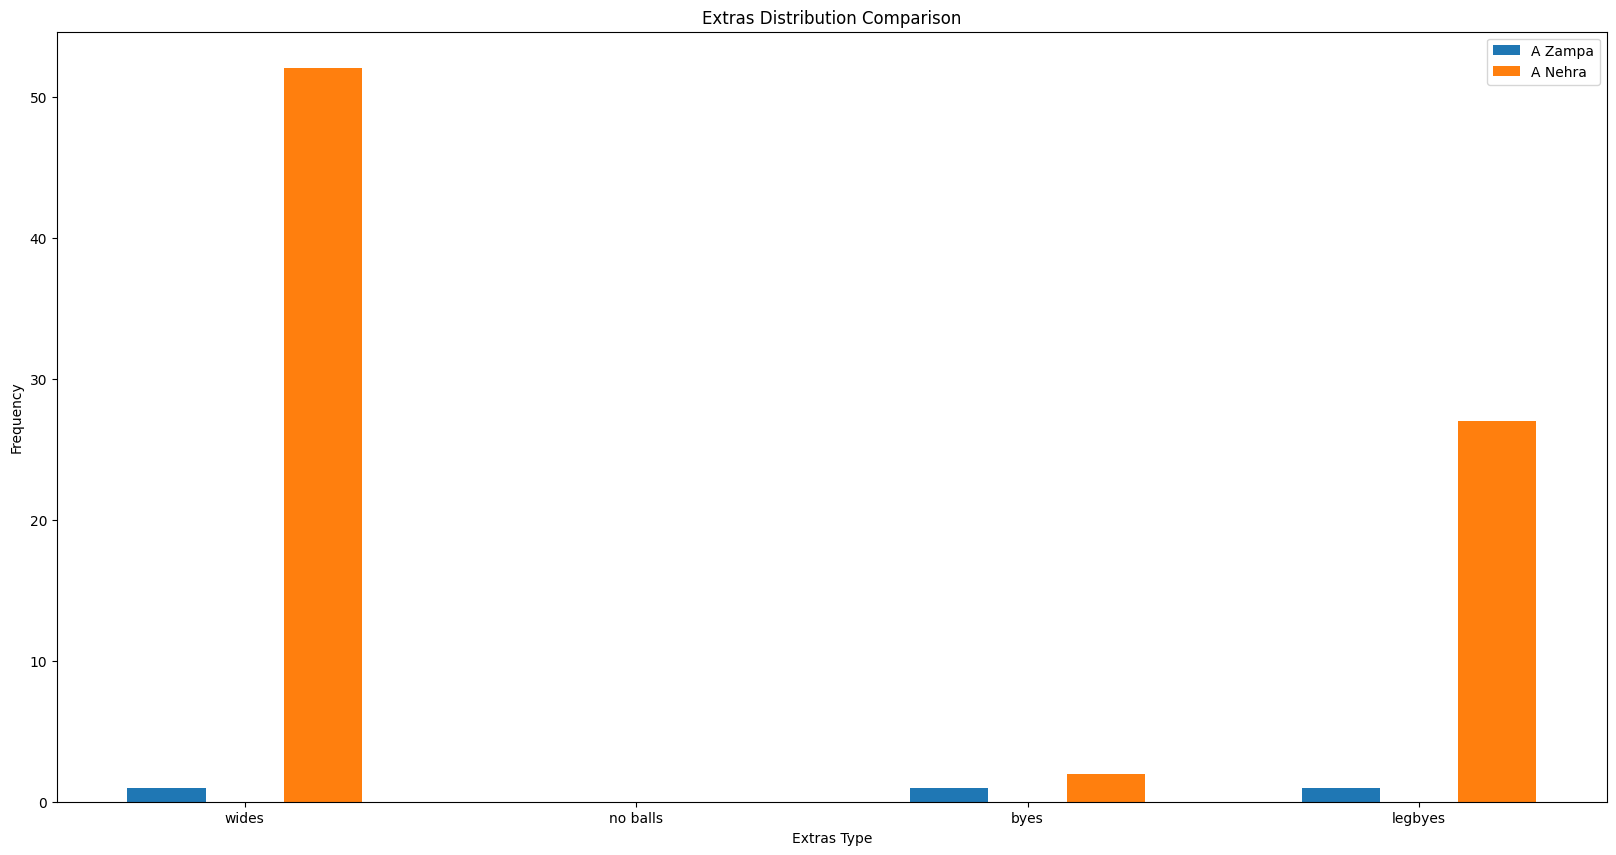

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot extras distribution for a given player
def plot_extras_distribution(players, df):
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(labels))

    for i, player in enumerate(players):
        df_player = df[df['bowler'] == player]
        if not df_player.empty:
            sizes = df_player[['wides', 'no balls', 'byes', 'legbyes']].sum().tolist()
            ax.bar(index + i * bar_width, sizes, bar_width, label=player)

    ax.set_xlabel('Extras Type')
    ax.set_ylabel('Frequency')
    ax.set_title('Extras Distribution Comparison')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.show()

# User input for three players
players = []
for i in range(3):
    player = input(f"Enter player {i+1}'s name: ")
    players.append(player)

# Plotting extras distribution for each player
plot_extras_distribution(players, df5)



In [ ]:
df6 = df[['batsman', 'bowler', 'batsman_runs']]
grouped_data = df6.groupby(['batsman', 'bowler'], as_index=False)['batsman_runs'].sum()
print(grouped_data.head())

          batsman         bowler  batsman_runs
0  A Ashish Reddy        A Nehra             7
1  A Ashish Reddy       AB Dinda             9
2  A Ashish Reddy     AD Mathews            25
3  A Ashish Reddy     AD Russell             4
4  A Ashish Reddy  Anureet Singh             2


In [ ]:
from sklearn.decomposition import FactorAnalysis
factor_model = FactorAnalysis(n_components=2, random_state=42)
factor_data = factor_model.fit_transform(grouped_data[['batsman_runs']])
grouped_data['Factor1'] = factor_data[:, 0]
selected_batsman = input("Enter the player's name: ")
batsman_data = grouped_data[grouped_data['batsman'] == selected_batsman]
more_runs_bowlers = batsman_data.sort_values(by='Factor1', ascending=False)[['bowler', 'batsman_runs']].head(5)
less_runs_bowlers = batsman_data.sort_values(by='Factor1')[['bowler', 'batsman_runs']].head(5)
print(f"Bowlers against whom {selected_batsman} has made more runs:")
for index, row in more_runs_bowlers.iterrows():
    print(f"{row['bowler']}: {row['batsman_runs']} runs")
print(f"\nBowlers against whom {selected_batsman} has made fewer runs:")
for index, row in less_runs_bowlers.iterrows():
    print(f"{row['bowler']}: {row['batsman_runs']} runs")

Enter the player's name: V Kohli
Bowlers against whom V Kohli has made more runs:
R Ashwin: 160 runs
A Mishra: 158 runs
DJ Bravo: 151 runs
UT Yadav: 141 runs
RA Jadeja: 123 runs

Bowlers against whom V Kohli has made fewer runs:
C Nanda: 0 runs
P Suyal: 0 runs
LA Carseldine: 0 runs
DAJ Bracewell: 0 runs
AN Ahmed: 0 runs


Enter the player's name: V Kohli


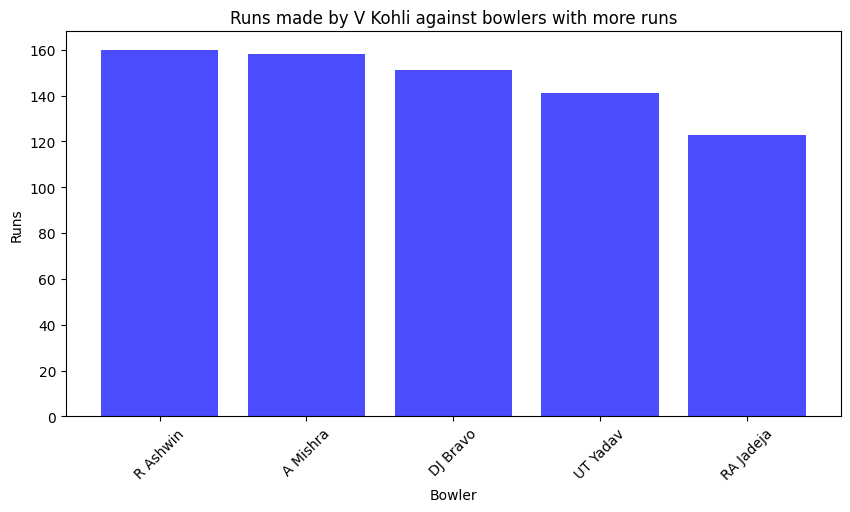

In [ ]:
selected_batsman = input("Enter the player's name: ")
more_runs_data_filtered = more_runs_bowlers[more_runs_bowlers['batsman_runs'] > 0]
plt.figure(figsize=(10, 5))
plt.bar(more_runs_data_filtered['bowler'], more_runs_data_filtered['batsman_runs'], color='blue', alpha=0.7)
plt.title(f"Runs made by {selected_batsman} against bowlers with more runs")
plt.xlabel("Bowler")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()

In [ ]:
selected_bowler = input("Enter the bowler's name: ")
bowler_data = grouped_data[grouped_data['bowler'] == selected_bowler]
more_runs_batsmen = bowler_data.sort_values(by='Factor1', ascending=False)[['batsman', 'batsman_runs']].head(5)
less_runs_batsmen = bowler_data.sort_values(by='Factor1')[['batsman', 'batsman_runs']].head(5)
print(f"Batsmen who have made more runs against {selected_bowler}:")
for index, row in more_runs_batsmen.iterrows():
    print(f"{row['batsman']}: {row['batsman_runs']} runs")
print(f"\nBatsmen who have made fewer runs against {selected_bowler}:")
for index, row in less_runs_batsmen.iterrows():
    print(f"{row['batsman']}: {row['batsman_runs']} runs")

Enter the bowler's name: RA Jadeja
Batsmen who have made more runs against RA Jadeja:
V Kohli: 123 runs
AB de Villiers: 110 runs
S Dhawan: 94 runs
KA Pollard: 87 runs
DA Miller: 85 runs

Batsmen who have made fewer runs against RA Jadeja:
B Lee: 0 runs
Mohammad Asif: 0 runs
MG Johnson: 0 runs
CA Ingram: 0 runs
M Prasidh Krishna: 0 runs


Enter the bowler's name: RA Jadeja


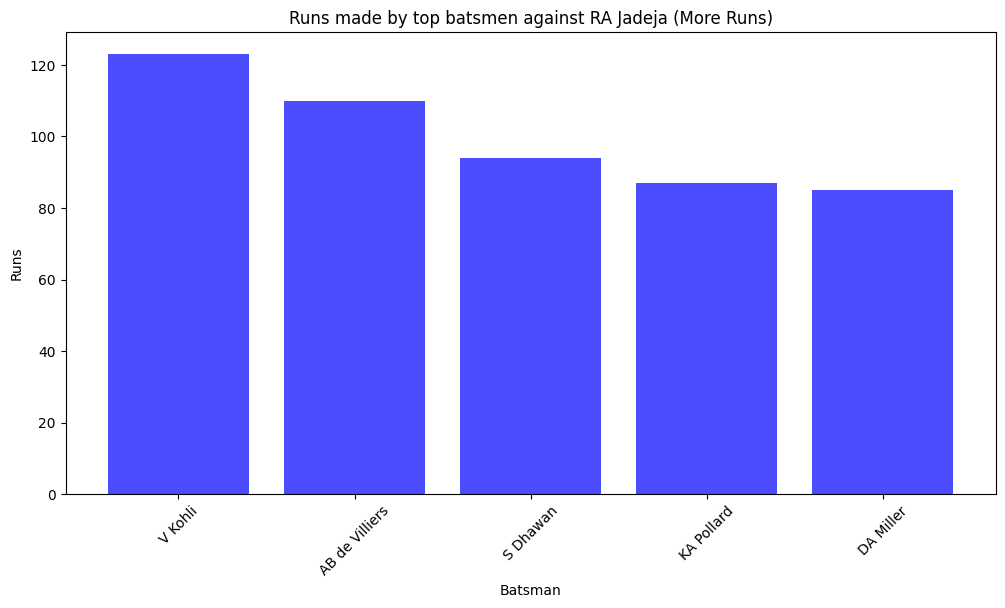

In [ ]:
import matplotlib.pyplot as plt
selected_bowler = input("Enter the bowler's name: ")
bowler_data = grouped_data[grouped_data['bowler'] == selected_bowler]
more_runs_batsmen = bowler_data.sort_values(by='Factor1', ascending=False)[['batsman', 'batsman_runs']].head(5)
less_runs_batsmen = bowler_data.sort_values(by='Factor1')[['batsman', 'batsman_runs']].head(5)
plt.figure(figsize=(12, 6))
plt.bar(more_runs_batsmen['batsman'], more_runs_batsmen['batsman_runs'], color='blue', alpha=0.7)
plt.title(f"Runs made by top batsmen against {selected_bowler} (More Runs)")
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()